# **Procedimiento de calibración DSC**

Frente a la necesidad de comenzar un nuevo proceso de calibración en el calorímetro DSC SETARAM, Labsys evo, se decide realizar el procedimiento elaborado en 2013 en un Notebook con la idea de introducir mejoras al mismo, si es posible.
Comenzaremos repdroduciendo el modelo utilizado en las calibraciones anteriores pero bajo lenguaje Python, para posteriormente compararla con los resolutados obtenidos en MATLAB.

## **Corrección en temperatura**
___

Para la calibración en temperatura se tomaron en cuenta simultáneamente los valores medidos de temperaturas de fusión y las velocidades de calentamiento utilizadas. Se construyó un sistema de ecuaciones lineales usando dichos valores medidos y velocidades seleccionadas como coeficientes conocidos, y los coeficientes de corrección como incógnitas que satisfacen las siguientes ecuaciones:

dT=A0+A1.Te+A2.V+A3.V^2 (1)

dT=Te–Treal (2)

en donde

A0, A1, A2 y A3 son los coeficientes de corrección, V: velocidad de calentamiento/enfriamiento, Te: temperatura medida, Treal: temperatura aceptada en literatura

La expresión dada por la (ec. 1), especializada en los diferentes valores de velocidad de calentamiento utilizados y en las distintas temperaturas de inicio de transformación determinadas, da lugar a un sistema de ecuaciones que posee un número significativamente mayor de ecuaciones que de incógnitas. Esto es, un sistema de ecuaciones sobredeterminado. Estos sistemas no tienen solución; sin embargo, puede encontrarse una pseudosolución.
Se optó por resolver el sistema de forma aproximada utilizando los métodos de mínimos cuadrados ordinarios y pseudoinversa de Moore-Penrose.

## **Modelos de ajuste lineal**
___

La regresión lineal es un método estadístico que trata de modelar la relación entre una variable continua y una o más variables independientes mediante el ajuste de una ecuación lineal. Se llama regresión lineal simple cuando solo hay una variable independiente y regresión lineal múltiple cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores, predictores o features. [1]



## **Procedimiento en Python**
___


------> TESTO AQUI
Importamos las variables desde una hoja de datos de Excel para luego procesarlas.

In [1]:
# Dependencies import
import numpy as np
import pandas as pd

# El resto acá
#

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading variables from the sheet
df = pd.read_excel('resultados_v2.xlsx', sheet_name='Kb')

# Checking the header imported
print(df.head(5))

# Generating NumPy Arrays
dT = df.Te.to_numpy() - df.Treal.to_numpy()
T = np.array([np.ones(dT.shape), df.Te.to_numpy(), df.V.to_numpy(), df.V.to_numpy() ** 2])

  Material   V       Te    Treal        S     H      m
0       In   1  153.826  156.599  718.647  28.5  79.47
1       In   5  153.829  156.599  716.907  28.5  79.47
2       In  10  153.669  156.599  714.251  28.5  79.47
3       In  20  153.137  156.599  691.163  28.5  79.47
4       In  50  152.623  156.599  691.652  28.5  79.47


## Pseudoinversa Moore Penrose

In [3]:
# Penrose Matrix with NumPy array
p = np.linalg.pinv(T)

# Check dimensions
print(type(p), np.shape(p), np.size(p))
print(type(dT), np.shape(dT), np.size(dT))

<class 'numpy.ndarray'> (92, 4) 368
<class 'numpy.ndarray'> (92,) 92


In [4]:
# Transpose Penrose Matrix for array multiplication
Tp = np.transpose(p)
print(type(Tp), np.shape(Tp), np.size(Tp))

# Multiplying matrix with NumPy array
A = np.matmul(Tp, dT)

# Show the coefficients
print('Coefficients are:')
for i in range(np.size(A)):
    print(f'A{i} = {A[i]:.2e}')

<class 'numpy.ndarray'> (4, 92) 368
Coefficients are:
A0 = -5.13e+00
A1 = 1.18e-03
A2 = -6.33e-02
A3 = 2.25e-04


## Mínimos cuadrados

In [5]:
# Transpose original Matrix for array multiplication
TT = np.transpose(T)

# Obtaining coefficient through Least Squares
X = np.linalg.lstsq(TT, dT, rcond = -1)

# Show the coefficients
print('Coefficients are:')
for i in range(np.size(X)):
    print(f'A{i} = {X[0][i]:.2e}')

Coefficients are:
A0 = -5.13e+00
A1 = 1.18e-03
A2 = -6.33e-02
A3 = 2.25e-04


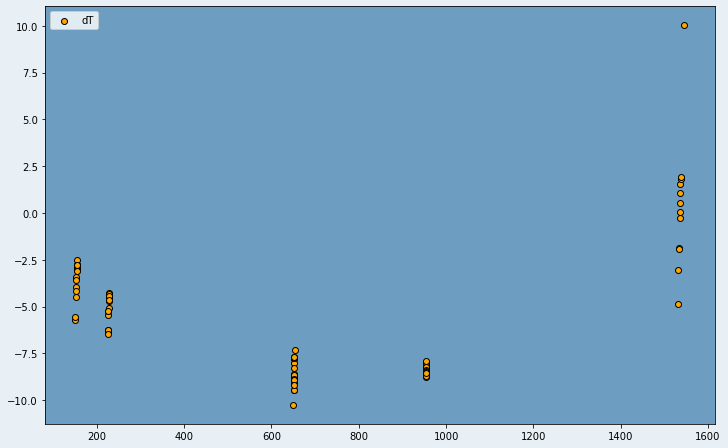

In [6]:
# ==============================================================================
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Gráfico del modelo
#fig = plt.figure(figsize=(6, 3.84))
fig = plt.figure(figsize=(12, 7.68))
fig.patch.set_facecolor("#6D9EC1")
fig.patch.set_alpha(0.15)

ax = fig.add_subplot()
ax.patch.set_facecolor("#6D9EC1")

ax.scatter(df.Te.to_numpy(), dT, marker='o', color = "blacK", facecolor = "orange", label="dT")
ax.legend();

## **Corrección en calor (Q)**
___

Para la calibración en calor se consideró la constante de sensibilidad K, que define el factor de proporcionalidad entre el área del pico medida, entre la curva y la linea de base, y el calor asociado a la transformación que ésta describe.

K = (S/H).(1/m) (3)


K=A0+A1.Te+A2.Te^2+A3.Te^3+A4.Te^4 (4)

siendo
A0, A1, A2, A3 y A4 son los coeficientes de corrección, Te: temperatura medida, m: masa, H: calor de fusión, S: área de pico (μV.s)

En este caso, los valores experimentales a considerar como coeficientes conocidos son Te y S.
Se aplicó la misma metodología que para corrección en temperatura y se tuvieron en cuenta las mismas consideraciones anteriormente mencionadas.

In [7]:
# Reading variables from the sheet
df = pd.read_excel('resultados_v2.xlsx', sheet_name='Kb')

# Checking the header imported
print(df.head(5))

# Generating NumPy Arrays
Te = df.Te.to_numpy()
H = df.H.to_numpy()
S = df.S.to_numpy()
m = df.m.to_numpy()
K = (S/H)*(1/m)
B = np.array([np.ones(Te.shape), Te, Te**2, Te**3, Te**4])

  Material   V       Te    Treal        S     H      m
0       In   1  153.826  156.599  718.647  28.5  79.47
1       In   5  153.829  156.599  716.907  28.5  79.47
2       In  10  153.669  156.599  714.251  28.5  79.47
3       In  20  153.137  156.599  691.163  28.5  79.47
4       In  50  152.623  156.599  691.652  28.5  79.47


## Pseudoinversa Moore Penrose

In [8]:
# Penrose Matrix with NumPy array
pB = np.linalg.pinv(B)

# Check dimensions
print(type(pB), np.shape(pB), np.size(pB))
print(type(K), np.shape(K), np.size(K))

<class 'numpy.ndarray'> (92, 5) 460
<class 'numpy.ndarray'> (92,) 92


In [9]:
# Transpose Penrose Matrix for array multiplication
TpB = np.transpose(pB)
print(type(TpB), np.shape(TpB), np.size(TpB))

# Multiplying matrix with NumPy array
C = np.matmul(TpB, K)

# Show the coefficients
print('Coefficients are:')
for i in range(B.shape[0]):
    print(f'C{i} = {C[i]:.4e}')

<class 'numpy.ndarray'> (5, 92) 460
Coefficients are:
C0 = 3.1540e-01
C1 = 6.5665e-05
C2 = -8.7879e-07
C3 = 1.1253e-09
C4 = -4.1755e-13


## Mínimos cuadrados

In [10]:
# Transpose original Matrix for array multiplication
TB = np.transpose(B)

# Obtaining coefficient through Least Squares
D = np.linalg.lstsq(TB, K, rcond = -1)

# Show the coefficients
print('Coefficients are:')
for u in range(B.shape[0]):
    print(f'D{u} = {D[0][u]:.4e}')

Coefficients are:
D0 = 3.1540e-01
D1 = 6.5679e-05
D2 = -8.7883e-07
D3 = 1.1253e-09
D4 = -4.1756e-13


## Agregando dos datos, como límites teóricos

In [11]:
Te = np.append(Te,[-273.0],axis= 0)
Te = np.append(Te,[1600],axis= 0)
K = np.append(K,[0.0],axis= 0)
K = np.append(K,[0.1],axis= 0)

B = np.array([np.ones(Te.shape), Te, Te**2, Te**3, Te**4])

## Pseudoinversa Moore Penrose

In [12]:
# Penrose Matrix with NumPy array
pB = np.linalg.pinv(B)

# Check dimensions
print(type(pB), np.shape(pB), np.size(pB))
print(type(K), np.shape(K), np.size(K))

<class 'numpy.ndarray'> (94, 5) 470
<class 'numpy.ndarray'> (94,) 94


In [13]:
# Transpose Penrose Matrix for array multiplication
TpB = np.transpose(pB)
print(type(TpB), np.shape(TpB), np.size(TpB))

# Multiplying matrix with NumPy array
C = np.matmul(TpB, K)

# Show the coefficients
print('Coefficients are:')
for i in range(B.shape[0]):
    print(f'C{i} = {C[i]:.4e}')

<class 'numpy.ndarray'> (5, 94) 470
Coefficients are:
C0 = 2.7575e-01
C1 = 3.9758e-04
C2 = -1.6311e-06
C3 = 1.7647e-09
C4 = -5.9837e-13


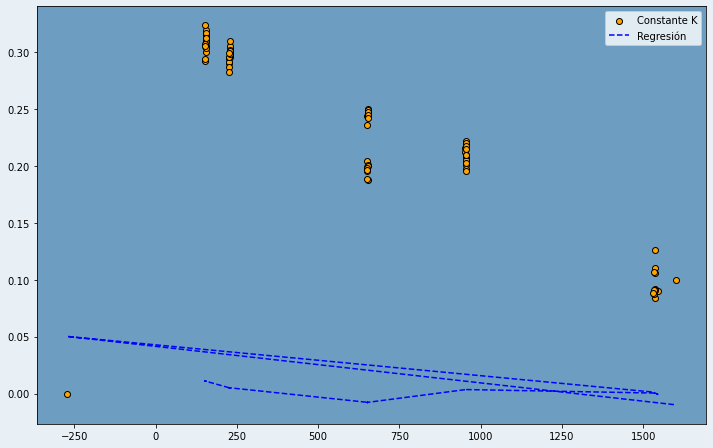

In [14]:
# ==============================================================================
# Gráficos
# ==============================================================================

# Gráfico del modelo
#fig = plt.figure(figsize=(6, 3.84))
fig = plt.figure(figsize=(12, 7.68))
fig.patch.set_facecolor("#6D9EC1")
fig.patch.set_alpha(0.15)

ax = fig.add_subplot()
ax.patch.set_facecolor("#6D9EC1")

ax.scatter(Te, K, marker='o', color = "blacK", facecolor = "orange", label="Constante K")
ax.plot(Te, np.matmul(C, TpB), linestyle='--', color = "blue", label="Regresión")
ax.legend();

In [15]:
Te

array([ 153.826,  153.829,  153.669,  153.137,  152.623,  153.602,
        153.695,  153.674,  153.601,  154.07 ,  153.804,  153.575,
        153.188,  152.132,  150.895,  153.84 ,  153.525,  152.996,
        152.43 ,  151.019,  227.554,  227.399,  227.288,  226.471,
        225.691,  227.579,  227.493,  227.203,  226.684,  225.59 ,
        227.585,  227.648,  227.527,  226.842,  225.701,  227.573,
        227.476,  227.278,  226.671,  225.443,  652.989,  652.506,
        652.325,  651.579,  650.074,  652.594,  652.607,  652.612,
        652.064,  650.876,  651.349,  650.884,  651.21 ,  651.218,
        651.715,  651.585,  651.689,  651.477,  651.426,  651.117,
        953.57 ,  953.425,  953.197,  953.243,  953.666,  953.526,
        953.439,  953.471,  953.258,  953.785,  953.264,  953.204,
        953.037,  953.083,  953.563,  953.371,  953.314,  953.304,
        953.24 ,  953.88 , 1536.572, 1536.84 , 1536.934, 1545.026,
       1536.088, 1535.536, 1535.076, 1534.72 , 1533.125, 1533.

___

### Está bien todo lo que sigue?

## **Modelos de regresión lineal en Python**

Dos de las implementaciones de modelos de regresión lineal más utilizadas en Python son: scikit-learn y statsmodels. Aunque ambas están muy optimizadas, Scikit-learn está orientada principalmente a la predicción, por lo que no dispone de apenas funcionalidades que muestren las muchas características del modelo que se deben analizar para hacer inferencia. Statsmodels es mucho más completo en este sentido. [1]

In [16]:
from scipy.stats import pearsonr

# Correlación lineal entre las variables
corr_test = pearsonr(x = Te, y =  K)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.834052660344055
P-value:  1.7031386441427702e-25


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Creación del modelo
#modelo = LinearRegression()
#modelo.fit(T, dT)

df_Te = pd.DataFrame(Te)
df_dT = pd.DataFrame(K)

X_train, X_test, y_train, y_test = train_test_split(
                                        df_Te.values.reshape(-1,1),
                                        df_dT.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [18]:
# ==============================================================================
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(Te, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(Te.reshape(-1, 1), K))

Intercept: [0.31464193]
Coeficiente: [(153.826, -0.0001265678580039002)]
Coeficiente de determinación R^2: 0.6950787263995024


In [19]:
ax.scatter(X_train.reshape(-1, 1), y = y_train)

In [20]:
# ==============================================================================
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[0.23199451]
 [0.12060328]
 [0.12074681]]

El error (rmse) de test es: 0.02449282037018572


In [21]:
Te.shape

(94,)

In [22]:
y_test.shape

(19, 1)

In [23]:
y_train.shape

(75, 1)

In [24]:
predicciones.shape

(19, 1)

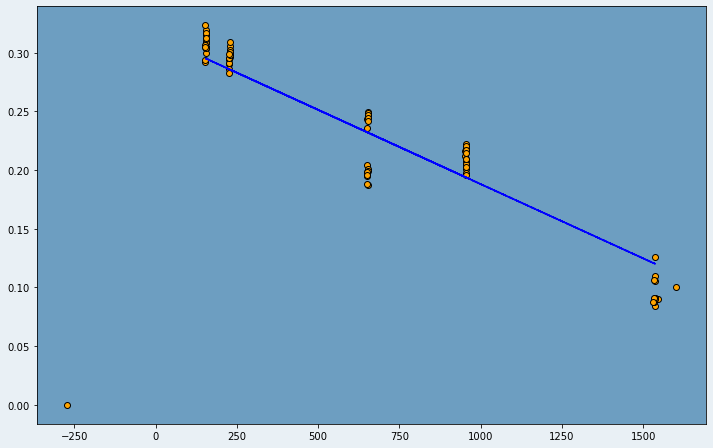

In [25]:
# Gráfico del modelo
#fig = plt.figure(figsize=(6, 3.84))
fig = plt.figure(figsize=(12, 7.68))
fig.patch.set_facecolor("#6D9EC1")
fig.patch.set_alpha(0.15)

ax = fig.add_subplot()
ax.patch.set_facecolor("#6D9EC1")
ax.scatter(Te, K, marker='o', color = "blacK", facecolor = "orange")
ax.plot(X_test, predicciones, linestyle='--', color = "blue")

## **Statsmodels**
### La implementación de regresión lineal de Statsmodels, es más completa que la de Scikitlearn ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. Statsmodels tiene dos formas de entrenar el modelo:
    Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores. Esta forma es similar a la utilizada en R.
    Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por Scikitlearn con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.


In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# ==============================================================================
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     131.7
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           5.25e-18
Time:                        13:14:51   Log-Likelihood:                 127.19
No. Observations:                  75   AIC:                            -250.4
Df Residuals:                      73   BIC:                            -245.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3146      0.008     38.136      0.0

## **Intervalos de confianza de los coeficientes**

In [27]:
# ==============================================================================
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[ 2.98198492e-01,  3.31085372e-01],
       [-1.48551927e-04, -1.04583789e-04]])

## **Predicciones**

### Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular las predicciones de dos formas:
    .predict(): devuelve únicamente el valor de las predicciones.
    .get_prediction().summary_frame(): devuelve, además de las predicciones, los intervalos de confianza asociados.

In [28]:
# ==============================================================================
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.285931,0.006501,0.272975,0.298887,0.195328,0.376535
1,0.285851,0.006496,0.272903,0.298798,0.195248,0.376453
2,0.295325,0.007023,0.281327,0.309322,0.204566,0.386083
3,0.295175,0.007014,0.281195,0.309155,0.204420,0.385931


## **Representación gráfica del modelo**
### Además de la línea de mínimos cuadrados, es recomendable incluir los límites superior e inferior del intervalo de confianza. Esto permite identificar la región en la que, según el modelo generado y para un determinado nivel de confianza, se encuentra el valor promedio de la variable respuesta.

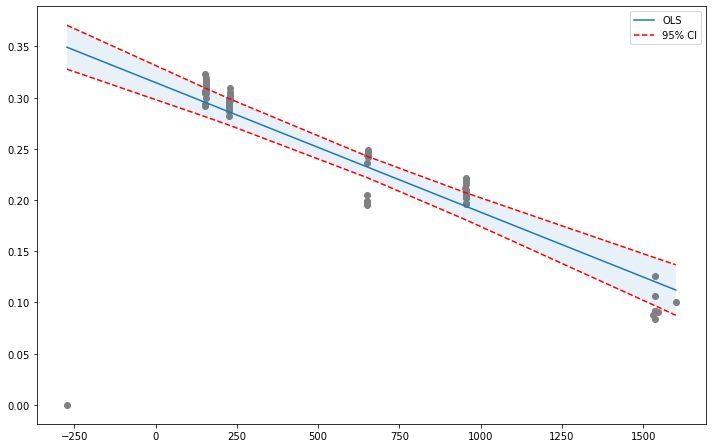

In [29]:
# ==============================================================================
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# ==============================================================================
# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 7.68))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

## **Prueba con formula**
### Scikit-Learn - Statsmodels.BetaModel

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.othermod.betareg import BetaModel

#model = smf.glm(formula = formula, data=df, family=sm.families.Binomial())
Z = [K, Te]

def myFormula(K, x):
    return lambda K,x: (K, Te + I(Te)^2 + I(Te)^3 + Te^4)


#formula = lambda K,x: Te + Te^2 + Te^3 + Te^4 = K
model = BetaModel.from_formula("lambda K,x: Te + Te^2 + Te^3 + Te^4", Te, family = sm.families.Gaussian(link=sm.families.links.identity()))
rslt = model.fit()

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

### probando

In [ ]:
Teee = Te.reshape(-1, 1)

In [ ]:
KKK = K.reshape(-1, 1)

In [ ]:
formula = 'KKK ~ Te + I(Te^2) + I(Te^3) + I(Te^4)'

In [ ]:
from sklearn import linear_model

reg = linear_model.BayesianRidge()
#reg.fit(Te.reshape(-1,1), formula)
reg.fit(Te, formula)

### **Probando con curve_fit()**

In [ ]:
from scipy.optimize import curve_fit

# Reading variables from the sheet
df = pd.read_excel('resultados_v2.xlsx', sheet_name='Kb')
Tei = df.Te.to_numpy()
Vi = df.V.to_numpy()
Treali = df.Treal.to_numpy()

# Define the function
def DSC_T_function(Te, A, B, C, D):
    # Generating NumPy Arrays
    dT = Tei - Treali
    dT = A*np.ones(dT.shape) + B*Tei + C*Vi + D*Vi**2
    return dT


In [ ]:
parameters, covariance = curve_fit(DSC_T_function, Tei, dT)

In [ ]:
print(parameters)

In [ ]:
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
fit_D = parameters[3]

fit_DSC_func = DSC_T_function(Tei, fit_A, fit_B, fit_C, fit_D)

# Gráfico del modelo
#fig = plt.figure(figsize=(6, 3.84))
fig2 = plt.figure(figsize=(12, 7.68))
fig2.patch.set_facecolor("#6D9EC1")
fig2.patch.set_alpha(0.15)

ax2 = fig2.add_subplot()
ax2.patch.set_facecolor("#6D9EC1")
ax2.scatter(Tei, dT, marker='o', color = "blacK", facecolor = "orange", label='data')
ax2.plot(Tei, fit_DSC_func, linestyle='--', color = "blue", label='fit')


## REFERENCIAS

[1] "Regresión lineal con Python", Joaquín Amat Rodrigo, https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html (CC BY 4.0)